# Aula de Machine Learning: Algoritmo de Classificação com Índice de Gini utilizando scikit-learn

Neste notebook, iremos explorar um algoritmo de classificação baseado no índice de Gini utilizando a biblioteca scikit-learn. Abordaremos os conceitos teóricos, preparação dos dados, treinamento do modelo, avaliação de desempenho e interpretação dos resultados.

## Índice
1. [Introdução ao Algoritmo de Classificação](#introdução-ao-algoritmo-de-classificação)
2. [Importação das Bibliotecas Necessárias](#importação-das-bibliotecas-necessárias)
3. [Carregamento e Exploração dos Dados](#carregamento-e-exploração-dos-dados)
4. [Pré-processamento dos Dados](#pré-processamento-dos-dados)
5. [Divisão dos Dados em Conjuntos de Treino e Teste](#divisão-dos-dados-em-conjuntos-de-treino-e-teste)
6. [Treinamento do Modelo](#treinamento-do-modelo)
7. [Avaliação do Modelo](#avaliação-do-modelo)
8. [Importância das Features](#importância-das-features)
9. [Conclusão](#conclusão)

## Introdução ao Algoritmo de Classificação

Os algoritmos de classificação são utilizados para prever a categoria à qual uma nova observação pertence, com base em um conjunto de dados de treinamento que contém observações cuja categoria é conhecida. O índice de Gini é uma métrica utilizada para medir a impureza de um nó em uma árvore de decisão. Ele auxilia na seleção da melhor divisão dos dados durante a construção da árvore.

## Importação das Bibliotecas Necessárias


In [2]:
# Importação das bibliotecas essenciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importação das bibliotecas de machine learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Carregamento e Exploração dos Dados

Para esta aula, utilizaremos o famoso **Conjunto de Dados Iris**, que contém informações sobre três espécies de flores de íris. Cada amostra possui quatro características: comprimento e largura das sépalas e pétalas.


In [8]:
# Carregamento do conjunto de dados Iris
iris = load_iris()

# Criação de um DataFrame para melhor visualização
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['species'] = df_iris['target'].apply(lambda x: iris.target_names[x])
df_iris['species'] = pd.Categorical(df_iris['species'])
df_iris['species'] = df_iris['species'].cat.codes

# Visualização das primeiras linhas do DataFrame
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


### Análise Exploratória dos Dados

Vamos explorar a distribuição das classes e as relações entre as diferentes features.


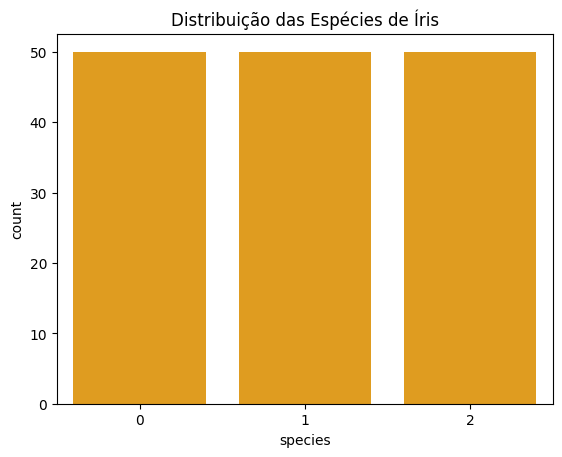

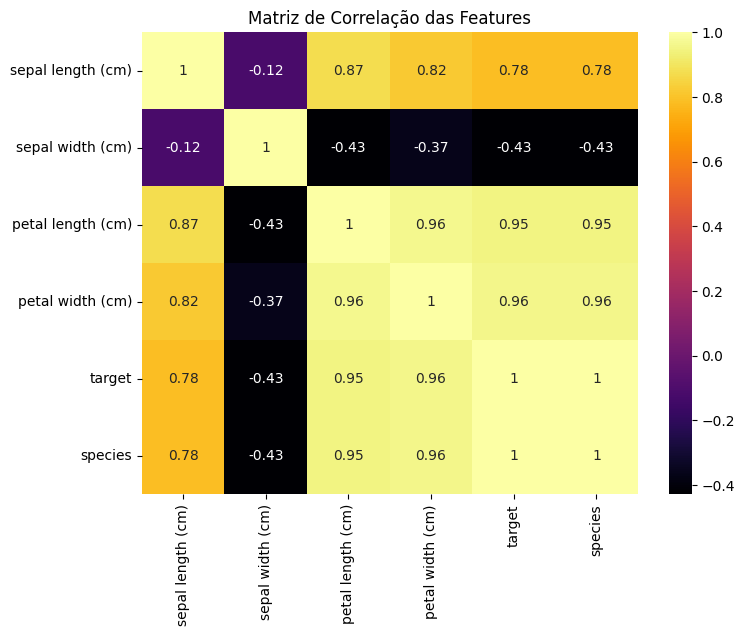

In [10]:
# Verificação da distribuição das classes
sns.countplot(x='species', data=df_iris, color= 'orange')
plt.title('Distribuição das Espécies de Íris')
plt.show()

# Matriz de correlação
plt.figure(figsize=(8,6))
sns.heatmap(df_iris.corr(), annot=True, cmap='inferno')
plt.title('Matriz de Correlação das Features')
plt.show()


## Pré-processamento dos Dados

Antes de treinar o modelo, é importante garantir que os dados estejam adequadamente preparados. No caso do conjunto Iris, os dados já estão limpos, mas vamos verificar se há valores ausentes.


In [11]:
# Verificação de valores ausentes
print(df_iris.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


Como não há valores ausentes, podemos prosseguir para a divisão dos dados.


## Divisão dos Dados em Conjuntos de Treino e Teste

Dividiremos os dados em 80% para treinamento e 20% para teste, garantindo que o modelo seja avaliado em dados não vistos durante o treinamento.


In [12]:
# Definição das features e do target
X = df_iris.drop(['target', 'species'], axis=1)
y = df_iris['species']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamanho do conjunto de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} amostras')


Tamanho do conjunto de treino: 120 amostras
Tamanho do conjunto de teste: 30 amostras


## Treinamento do Modelo

Utilizaremos a classe `DecisionTreeClassifier` do scikit-learn, que por padrão utiliza o índice de Gini para medir a impureza dos nós.


In [13]:
# Instanciação do classificador com critério Gini
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Treinamento do modelo
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Avaliação do Modelo

Após o treinamento, avaliaremos o desempenho do modelo utilizando o conjunto de teste.


Acurácia do modelo: 1.00


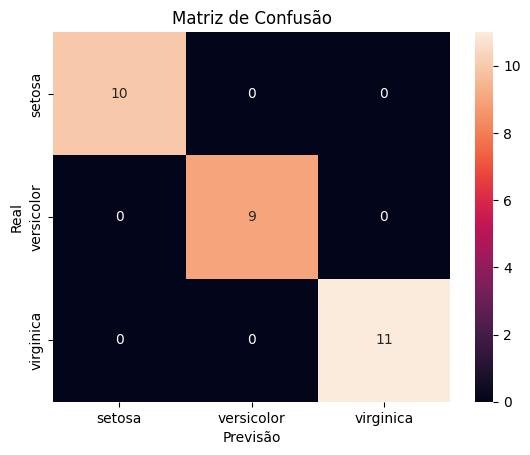

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
# Previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Cálculo da acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))


## Importância das Features

Vamos analisar quais features tiveram maior impacto na decisão do modelo.


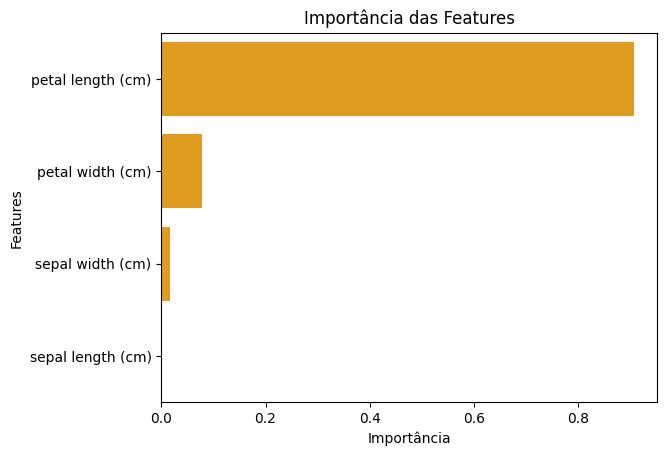

In [18]:
# Extração da importância das features
importances = clf.feature_importances_
feature_names = X.columns

# Criação de um DataFrame para visualização
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

# Visualização das importâncias
sns.barplot(x=feat_importances, y=feat_importances.index, color= 'orange')
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()


## Conclusão

Nesta aula, exploramos como utilizar o algoritmo de árvore de decisão baseado no índice de Gini para classificação. Vimos como preparar os dados, treinar o modelo, avaliar seu desempenho e interpretar a importância das features. As árvores de decisão são modelos poderosos e interpretáveis, sendo uma ótima escolha para problemas de classificação como o apresentado.

**Próximos Passos:**
- Explorar a poda de árvores para evitar overfitting.
- Comparar o desempenho com outros algoritmos de classificação, como Random Forest ou Support Vector Machines.
- Realizar validação cruzada para uma avaliação mais robusta do modelo.
